In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn


In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras import layers, models

## COMP 3132 -  Machine Learning with Python
__Week 12 lecture__

### [github.com/kamrik/ML2](https://github.com/kamrik/ML2)

### [slido.com/COMP3132](http://slido.com/COMP3132)


## Plan for today
 - Home assignment, join by April 3, submit by April 10
 - Using embeddings
 - Dropout & regularization

## Home assignment
 - [Instructions](https://github.com/kamrik/ML2/blob/master/exercises/home_assignment3.md)
 - [Competition page](https://www.kaggle.com/c/career-con-2019)
 - [Robot video](https://youtu.be/I6z26LVu5y0?t=21)

![robot](https://i.ytimg.com/vi/I6z26LVu5y0/maxresdefault.jpg)

![accelerometer](http://mintakaconciencia.net/squares/midi/img/accelerometer-scan-small.jpg)

![orientation](https://www.grc.nasa.gov/www/k-12/airplane/Images/rotations.gif)

### Measurements
 - orientation_X
 - orientation_Y
 - orientation_Z
 - orientation_W
 - angular_velocity_X
 - angular_velocity_Y
 - angular_velocity_Z
 - linear_acceleration_X
 - linear_acceleration_Y
 - linear_acceleration_Z

## Samples
- Short intervals with 128 time points each

 - [EDA](https://github.com/kamrik/ML2/blob/master/exercises/robots_EDA.ipynb)
 - whiteboard - 3D data / tensors

## Recurrent Neural Nets - RNNs

In [20]:
from keras import layers, models

n_timestamps = 128
n_features = 10

In [22]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(n_timestamps, n_features)))
model.add(layers.Dense(9, activation='softmax'))

In [23]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(n_timestamps, n_features),
                     return_sequences=True,
                    ))
model.add(layers.GRU(64))
model.add(layers.Dense(9, activation='softmax'))

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/05231650/rnn-neuron.png)

![](https://cdn-images-1.medium.com/max/800/1*yr0820z7YNRcDCWGisLC4g.png)

## Activation and loss function selection guide
![](https://cdn-images-1.medium.com/max/1000/1*IhP8BdoUpAbssltq0VBafg.png)

## Word embeddings

![](https://files.knime.com/sites/default/files/styles/inline_medium/public/word_embedding_-_word2vec_explained_-_figure1_0.png?itok=h_eMBl8O)

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/06062705/Word-Vectors.png)

In [55]:
import sklearn.datasets
data = sklearn.datasets.fetch_20newsgroups()

In [56]:
item = 4
print(data.target_names[data.target[item]])
print('-' * 40)
print(data.data[item])

sci.space
----------------------------------------
From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA
Distribution: sci
Lines: 23

From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):
>>In article <C5JLwx.4H9.1@cs.cmu.edu>, ETRAT@ttacs1.ttu.edu (Pack Rat) writes...
>>>"Clear caution & warning memory.  Verify no unexpected
>>>errors. ...".  I am wondering what an "expected error" might
>>>be.  Sorry if this is a really dumb question, but
> 
> Parity errors in memory or previously known conditions that were waivered.
>    "Yes that is an error, but we already knew about it"
> I'd be curious as to what the real meaning of the quote is.
> 
> tom


My understanding is that the 'expected errors' are basically
known bugs in the warning system software - things are checked
that don't have the right values in yet because they aren't
set till after launch, an

In [99]:
max_words = 20000
embedding_dim=32
phrase_len = 50


In [112]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [101]:
texts = data.data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [102]:
print('Found %s unique tokens.' % len(tokenizer.word_index))

Found 134142 unique tokens.


In [103]:
sequences[item][:10]

[14, 735, 9166, 1111, 15, 2708, 12694, 29, 53, 1602]

In [104]:
tokenizer.word_index['from']

14

In [119]:
matrix = pad_sequences(sequences, maxlen=phrase_len, truncating='post').astype('float32')

In [107]:
matrix.shape

(11314, 50)

In [106]:
matrix[item]

array([   14,   735,  9166,  1111,    15,  2708, 12694,    29,    53,
        1602,  1112,   202,    34, 17016, 17017,  4309,  1569,   695,
         220,   149,   802,    32,   447,    14,    61,   154,  1962,
          31,    35,   154,  1962,    31,   903,     4,  3786,     7,
          61,    24,   137,   591,    15, 12695,    15,  3712,  6359,
          55,   741, 10462,  1817,   506])

In [120]:
y = to_categorical(data.target).astype('float32')

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
Xf, Xv, yf, yv = train_test_split(matrix, y, test_size=0.2)

In [179]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=phrase_len))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.GRU(64))
model.add(layers.Dense(20, activation='softmax'))


In [180]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [181]:
hist = model.fit(Xf, yf,
                 validation_data=(Xv,yv),
                 epochs=10)

Train on 9051 samples, validate on 2263 samples
Epoch 1/10
9051/9051 [==============================] - 2s - loss: 2.7695 - acc: 0.2322 - val_loss: 2.3069 - val_acc: 0.3646
Epoch 2/10
9051/9051 [==============================] - 1s - loss: 1.5450 - acc: 0.6472 - val_loss: 1.3553 - val_acc: 0.6390
Epoch 3/10
9051/9051 [==============================] - 1s - loss: 0.6732 - acc: 0.8616 - val_loss: 0.9269 - val_acc: 0.7362
Epoch 4/10
9051/9051 [==============================] - 1s - loss: 0.2729 - acc: 0.9494 - val_loss: 0.7694 - val_acc: 0.7693
Epoch 5/10
9051/9051 [==============================] - 1s - loss: 0.0930 - acc: 0.9867 - val_loss: 0.7265 - val_acc: 0.7888
Epoch 6/10
9051/9051 [==============================] - 1s - loss: 0.0236 - acc: 0.9977 - val_loss: 0.7308 - val_acc: 0.8029
Epoch 7/10
9051/9051 [==============================] - 1s - loss: 0.0050 - acc: 0.9994 - val_loss: 0.8089 - val_acc: 0.8038
Epoch 8/10
9051/9051 [==============================] - 1s - loss: 0.0024 - a

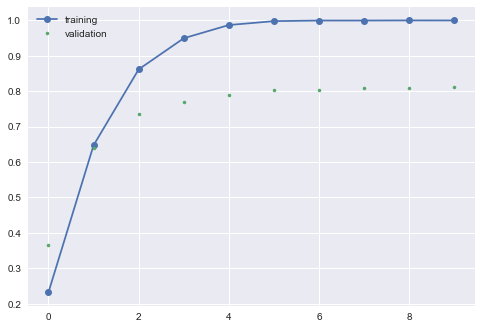

In [182]:
plt.plot(hist.history['acc'], '-o', label='training')
plt.plot(hist.history['val_acc'], '.', label='validation')
_ = plt.legend()

In [183]:
emb = models.Model(inputs=[model.input], outputs=[model.layers[0].output])

In [200]:
dummy = np.zeros((3, phrase_len), dtype='float32')
dummy[0,0] = tokenizer.word_index['car']
dummy[1,0] = tokenizer.word_index['truck']
dummy[2,0] = tokenizer.word_index['rocket']
vecs = emb.predict(dummy)

In [201]:
vecs.shape

(3, 50, 32)

In [203]:
w1 = vecs[0,0,:]
w2 = vecs[1,0,:]
w3 = vecs[2,0,:]
print(np.correlate(w1, w2))
print(np.correlate(w1, w3))
print(np.correlate(w2, w3))


[ 0.50463176]
[-0.12174845]
[-0.02938677]


## N-grams
 * https://books.google.com/ngrams/

https://nlp.stanford.edu/projects/glove/